# Data Intensive and Applications 

# Machine Learning with Spark

####  Emre Mert Dübüş  - 21727192                              
                                                       

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

    The aim of this assignment is to make you familiar with the basics of Apache Spark and machine learning methods using Spark Environment.

    First of all, to make a WordCount application with Spark, then to develop machine learning techniques with clustering and classification methods with the given dataset. While doing all this, operations such as data cleaning, preparation and visualization will also be done.

# Installing Spark 

In [1]:
import findspark

In [2]:
findspark.init("C:\spark")

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [4]:
spark = SparkSession \
    .builder \
    .appName("Starting Assignment3") \
    .getOrCreate()

sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

C:\spark\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# TASK 1 : Word Count Application with Spark

We used Don Quixote as book

In [5]:
read = sc.textFile("C:\sparkDataset\donkisot.txt")

In [6]:
read.count()

41630

In [7]:
read = read.map(lambda x : x.encode("ascii","ignore"))

In [8]:
read.take(20)

[b'Still more remarkable is the character of this wide diffusion. Don',
 b'Quixote has been thoroughly naturalised among people whose ideas about',
 b'knight-errantry, if they had any at all, were of the vaguest, who had',
 b'never seen or heard of a book of chivalry, who could not possibly feel',
 b'the humour of the burlesque or sympathise with the authors purpose.',
 b'Another curious fact is that this, the most cosmopolitan book in the',
 b'world, is one of the most intensely national. Manon Lescaut is not',
 b'more thoroughly French, Tom Jones not more English, Rob Roy not',
 b'more Scotch, than Don Quixote is Spanish, in character, in ideas, in',
 b'sentiment, in local colour, in everything. What, then, is the secret of',
 b'this unparalleled popularity, increasing year by year for well-nigh',
 b'three centuries? One explanation, no doubt, is that of all the books in',
 b'the world, Don Quixote is the most catholic. There is something in it',
 b'for every sort of reader, young or

In [9]:
read.first()

b'Still more remarkable is the character of this wide diffusion. Don'

In [10]:
counts = read.flatMap(lambda line: line.split(" ")).map(lambda word: (word,1))


In [11]:
counts.count

<bound method RDD.count of PythonRDD[5] at RDD at PythonRDD.scala:53>

In [12]:
wordCounts = read.flatMap(lambda line: line.split()).map(lambda word: (word,1)).reduceByKey(lambda a,b : a+b)
print(wordCounts.takeOrdered(300,lambda c: -c[1]))

[(b'the', 20240), (b'and', 16459), (b'to', 13175), (b'of', 12363), (b'that', 7126), (b'a', 6754), (b'in', 6643), (b'I', 6258), (b'he', 5475), (b'for', 4645), (b'his', 4323), (b'as', 4148), (b'it', 4128), (b'is', 3439), (b'with', 3438), (b'not', 3371), (b'was', 3243), (b'be', 3007), (b'my', 2731), (b'Don', 2567), (b'have', 2472), (b'they', 2443), (b'him', 2364), (b'all', 2355), (b'this', 2277), (b'said', 2177), (b'on', 2144), (b'or', 2127), (b'had', 2113), (b'by', 1965), (b'so', 1957), (b'you', 1889), (b'at', 1860), (b'but', 1807), (b'her', 1775), (b'who', 1712), (b'me', 1700), (b'which', 1679), (b'what', 1628), (b'if', 1579), (b'will', 1502), (b'from', 1474), (b'your', 1310), (b'one', 1271), (b'are', 1270), (b'were', 1239), (b'would', 1193), (b'no', 1177), (b'them', 1123), (b'she', 1093), (b'thou', 1091), (b'Quixote', 1020), (b'there', 1005), (b'their', 971), (b'more', 966), (b'than', 944), (b'The', 925), (b'Sancho', 914), (b'has', 899), (b'we', 876), (b'when', 867), (b'any', 855), (b'

# TASK 2 

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [14]:
withPandas = pd.read_csv('data.csv') 

temp_df = spark.read.csv("data.csv")

In [15]:
# Before spark, we wanted to print a table about the dataset.
withPandas.head(5)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [16]:
# before spark checking with  info()

withPandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

-

null value does not exist here. We will also check on the pyspark side. whether an error occurred.

-

In [17]:
sqlc=SQLContext(sc) 
df=sqlc.createDataFrame(withPandas) 


# TABLOYU GÖRSEL OLARAK BOZMADAN , BİR MİKTAR KOLONUN İSTATİSTİKLERİ GÖSTERİLMİŞTİR

df.select("Area", "Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity").summary().show()

df.select("ConvexArea","EquivDiameter","Extent","Solidity","roundness").summary().show()

df.select("Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","Class").summary().show()


C:\spark\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|              Area|         Perimeter|   MajorAxisLength|   MinorAxisLength|       AspectRation|       Eccentricity|
+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|  count|             13611|             13611|             13611|             13611|              13611|              13611|
|   mean|53048.284549261625| 855.2834585996624|320.14186730321796|202.27071408288148| 1.5832419790188077| 0.7508949293723464|
| stddev|29324.095716881908|214.28969589196112|  85.6941859593331|44.970091294114546|0.24667845568580268|0.09200176320620897|
|    min|             20420|           524.736|        183.601165|       122.5126535|        1.024867596|        0.218951263|
|    25%|             36325|           703.479|       253.2988918|        175.833589|        1.432252136|        0.715

In [18]:
# column infos and types 
# default nullable 

df.printSchema() 


# we printed column names


columns = list()
columns_ = df.columns
print(columns_)


root
 |-- Area: long (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- AspectRation: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: long (nullable = true)
 |-- EquivDiameter: double (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Solidity: double (nullable = true)
 |-- roundness: double (nullable = true)
 |-- Compactness: double (nullable = true)
 |-- ShapeFactor1: double (nullable = true)
 |-- ShapeFactor2: double (nullable = true)
 |-- ShapeFactor3: double (nullable = true)
 |-- ShapeFactor4: double (nullable = true)
 |-- Class: string (nullable = true)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [19]:
# KOLONLARDA NULL DEĞER VAR MI ONU KONTROL EDİYORUZ

from pyspark.sql.functions import col,isnan, when, count

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns[:9]]
   ).show()

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns[9:]]
   ).show()

+----+---------+---------------+---------------+------------+------------+----------+-------------+------+
|Area|Perimeter|MajorAxisLength|MinorAxisLength|AspectRation|Eccentricity|ConvexArea|EquivDiameter|Extent|
+----+---------+---------------+---------------+------------+------------+----------+-------------+------+
|   0|        0|              0|              0|           0|           0|         0|            0|     0|
+----+---------+---------------+---------------+------------+------------+----------+-------------+------+

+--------+---------+-----------+------------+------------+------------+------------+-----+
|Solidity|roundness|Compactness|ShapeFactor1|ShapeFactor2|ShapeFactor3|ShapeFactor4|Class|
+--------+---------+-----------+------------+------------+------------+------------+-----+
|       0|        0|          0|           0|           0|           0|           0|    0|
+--------+---------+-----------+------------+------------+------------+------------+-----+



-

we are sure about not exist null value 

-

## Data Preparation<a class="anchor" id="data_preparation"></a>

root
 |-- Area: long (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- AspectRation: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: long (nullable = true)
 |-- EquivDiameter: double (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Solidity: double (nullable = true)
 |-- roundness: double (nullable = true)
 |-- Compactness: double (nullable = true)
 |-- ShapeFactor1: double (nullable = true)
 |-- ShapeFactor2: double (nullable = true)
 |-- ShapeFactor3: double (nullable = true)
 |-- ShapeFactor4: double (nullable = true)
 |-- Class: long (nullable = true)



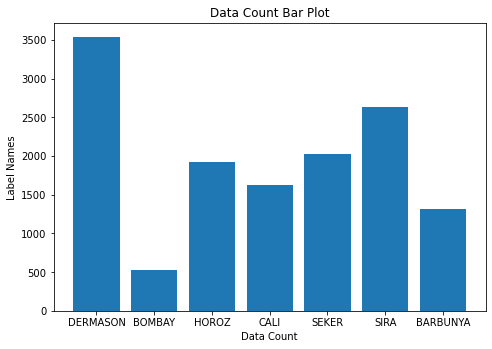

+-----+---------+---------------+---------------+------------+------------+
| Area|Perimeter|MajorAxisLength|MinorAxisLength|AspectRation|Eccentricity|
+-----+---------+---------------+---------------+------------+------------+
|28395|  610.291|    208.1781167|     173.888747| 1.197191424| 0.549812187|
|28734|  638.018|    200.5247957|    182.7344194| 1.097356461| 0.411785251|
|29380|   624.11|    212.8261299|    175.9311426| 1.209712656| 0.562727317|
|30008|  645.884|     210.557999|    182.5165157| 1.153638059| 0.498615976|
|30140|  620.134|    201.8478822|    190.2792788|  1.06079802| 0.333679658|
+-----+---------+---------------+---------------+------------+------------+
only showing top 5 rows

+----------+-------------+-----------+-----------+-----------+
|ConvexArea|EquivDiameter|     Extent|   Solidity|  roundness|
+----------+-------------+-----------+-----------+-----------+
|     28715|  190.1410973|0.763922518|0.988855999|0.958027126|
|     29172|  191.2727505|0.783968133|0

In [20]:
#  LABEL ENCODING

df_for_label = df.toPandas() 
df_for_label['Class'] = df_for_label['Class'].map({'SEKER': 4,'BARBUNYA': 6,'BOMBAY': 1,'CALI': 3,'HOROZ': 2,'SIRA': 5,"DERMASON" :0})

# print(df_for_label['Class'][df_for_label['Class'] == 0 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 1 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 2 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 3 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 4 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 5 ].count())
# print(df_for_label['Class'][df_for_label['Class'] == 6 ].count())

df_last=spark.createDataFrame(df_for_label) 
df_last_cluster=spark.createDataFrame(df_for_label) 

df_last.printSchema()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DERMASON', 'BOMBAY', 'HOROZ', 'CALI', 'SEKER','SIRA',"BARBUNYA"]
students = [3546,522,1928,1630,2027,2636,1322]
ax.bar(langs,students)
plt.xlabel("Data Count")
plt.ylabel("Label Names")
plt.title("Data Count Bar Plot")
plt.show()


df_last.select("Area", "Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity").show(5)
df_last.select("ConvexArea","EquivDiameter","Extent","Solidity","roundness").show(5)
df_last.select("Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","Class").show(5)

<AxesSubplot:>

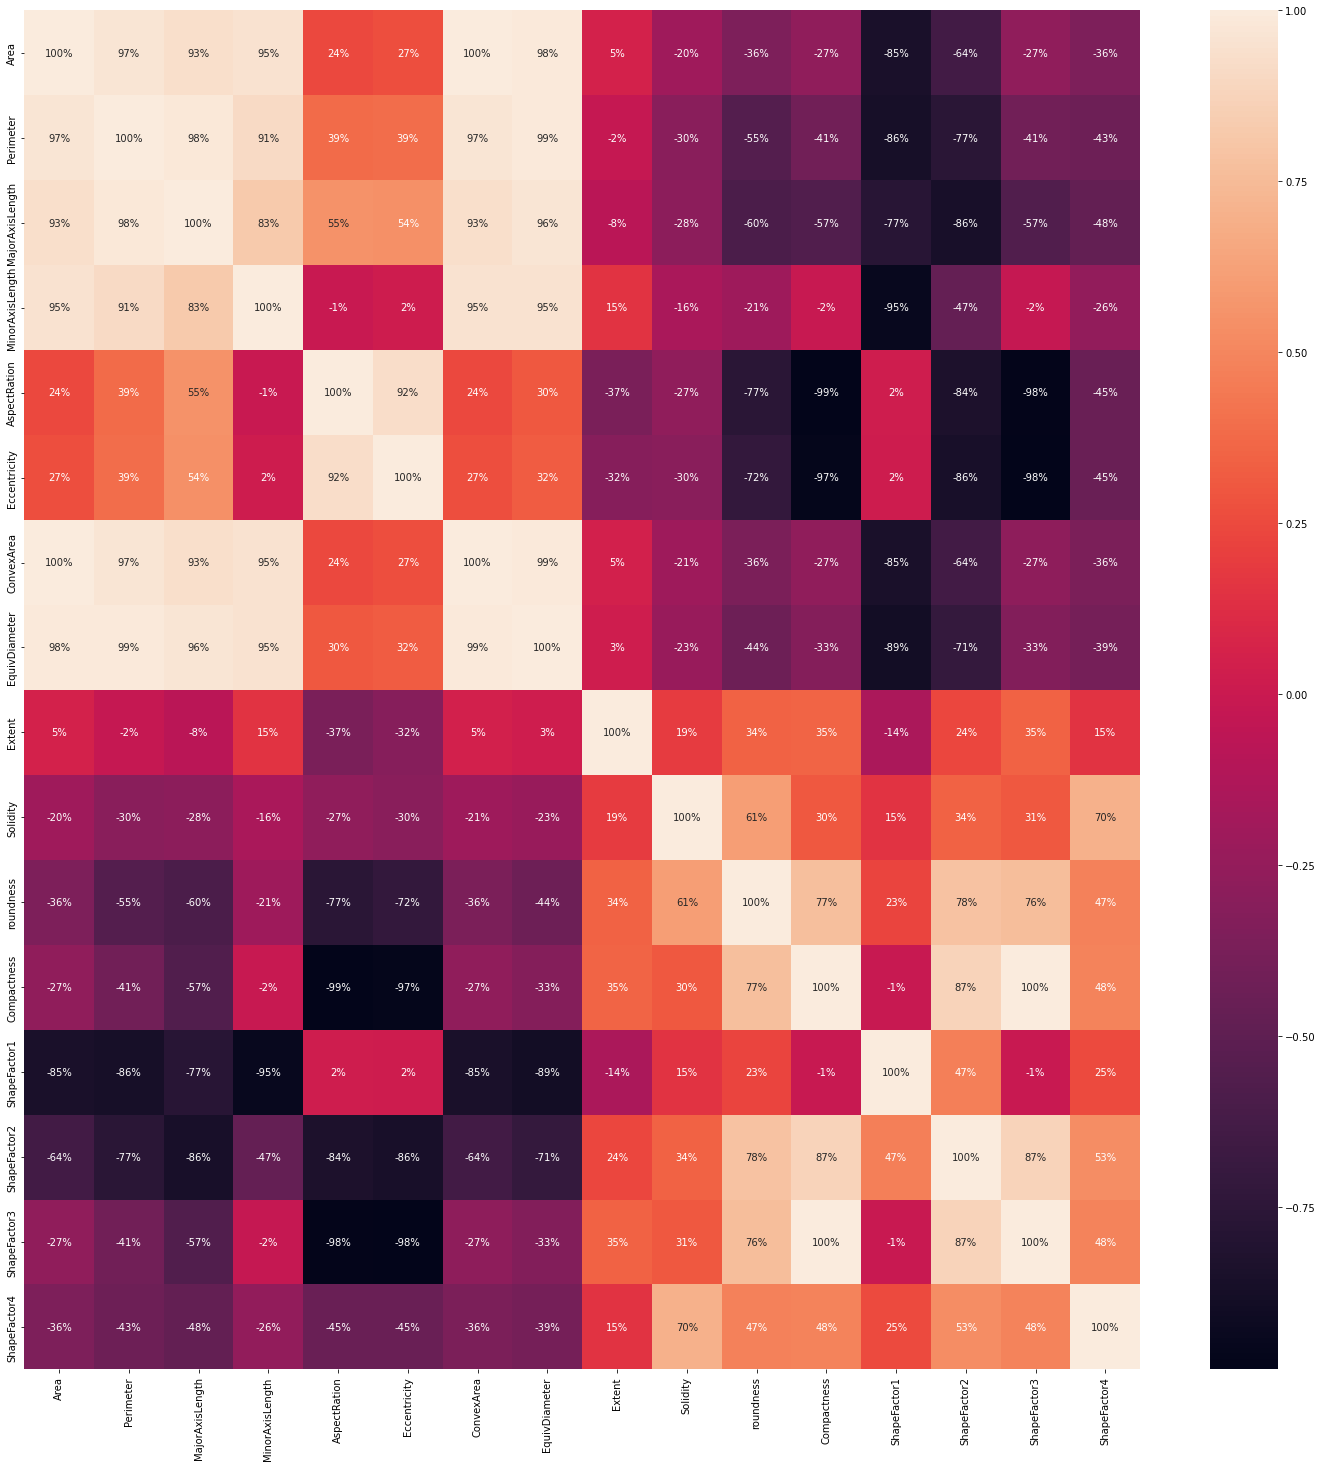

In [21]:
# HEAT MAP
plt.figure(figsize=(25,25))
sns.heatmap(withPandas.iloc[:,:].corr(), annot=True, fmt='.0%')

# Modeling for Clustering 

In [22]:
import numpy as np

In [23]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

vecAssembler = VectorAssembler(inputCols=['ConvexArea', 'EquivDiameter',], outputCol="features")

df_kmeans = vecAssembler.transform(df_last_cluster)


kmeans = KMeans().setK(7).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()


print("Cluster Centers: ")
for center in centers:
    print(center)

transformed = model.transform(df_kmeans)

    

d = df_last_cluster.toPandas()
t = d.iloc[:,[6,7]]
x = t.values

Cluster Centers: 
[42426.57129651   230.93568478]
[160104.6039604     448.31318688]
[85862.77072121   327.7957759 ]
[54582.98580376   261.59403878]
[31680.81183099   199.31545559]
[70771.65185185   297.65508533]
[198292.32718894    498.53233375]


In [24]:
pddf_transformed = transformed.toPandas()


In [25]:
centers = np.array(centers)

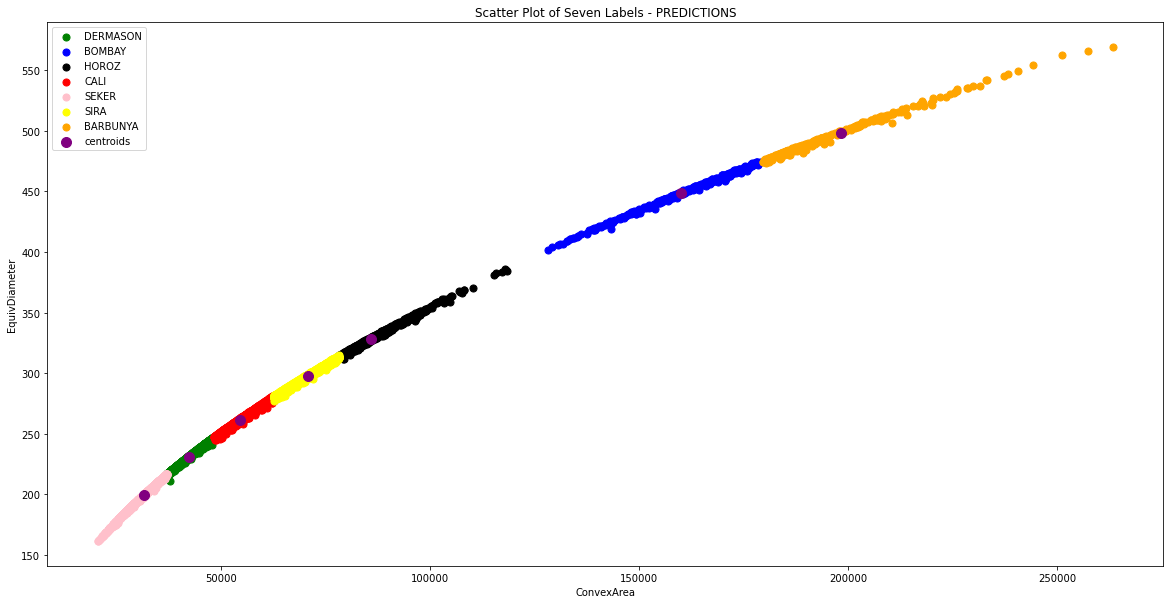

In [26]:


plt.figure(figsize = (20,10))
plt.scatter(x[pddf_transformed.prediction == 0,0],x[pddf_transformed.prediction == 0,1],s = 50, c = 'green', label = "DERMASON")
plt.scatter(x[pddf_transformed.prediction == 1,0],x[pddf_transformed.prediction == 1,1],s = 50, c = 'blue', label = "BOMBAY")
plt.scatter(x[pddf_transformed.prediction == 2,0],x[pddf_transformed.prediction == 2,1],s = 50, c = 'black', label = "HOROZ")
plt.scatter(x[pddf_transformed.prediction == 3,0],x[pddf_transformed.prediction == 3,1],s = 50, c = 'red', label = "CALI")
plt.scatter(x[pddf_transformed.prediction == 4,0],x[pddf_transformed.prediction == 4,1],s = 50, c = 'pink', label = "SEKER")
plt.scatter(x[pddf_transformed.prediction == 5,0],x[pddf_transformed.prediction == 5,1],s = 50, c = 'yellow', label = "SIRA")
plt.scatter(x[pddf_transformed.prediction == 6,0],x[pddf_transformed.prediction == 6,1],s = 50, c = 'orange', label = "BARBUNYA")


plt.scatter(centers[:,0],centers[:,1], s = 100, c = "purple", label = "centroids")
plt.xlabel("ConvexArea")
plt.ylabel("EquivDiameter")
plt.title("Scatter Plot of Seven Labels - PREDICTIONS")
plt.legend()
plt.show()



# 
#                    SCALİNG
# 
# 
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),5), DoubleType())

# Iterating over columns to be scaled
for i in ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    df_last = pipeline.fit(df_last).transform(df_last).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")

print("After Scaling :")
df_last.select("Area", "Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity").show(5)
df_last.select("ConvexArea","EquivDiameter","Extent","Solidity","roundness").show(5)
df_last.select("Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","Class").show(5)
df_last.select("Area_Scaled", "Perimeter_Scaled","MajorAxisLength_Scaled","MinorAxisLength_Scaled","AspectRation_Scaled","Eccentricity_Scaled").show(5)
df_last.select("ConvexArea_Scaled","EquivDiameter_Scaled","Extent_Scaled","Solidity_Scaled","roundness_Scaled").show(5)
df_last.select("Compactness_Scaled","ShapeFactor1_Scaled","ShapeFactor2_Scaled","ShapeFactor3_Scaled","ShapeFactor4_Scaled").show(5)




#  ND DATASET is here



normalized_dataset = df_last.select([col for col in df_last.columns[17:]])


normalized_dataset.select("Area_Scaled", "Perimeter_Scaled","MajorAxisLength_Scaled","MinorAxisLength_Scaled","AspectRation_Scaled","Eccentricity_Scaled").show(5)
normalized_dataset.select("ConvexArea_Scaled","EquivDiameter_Scaled","Extent_Scaled","Solidity_Scaled","roundness_Scaled").show(5)
normalized_dataset.select("Compactness_Scaled","ShapeFactor1_Scaled","ShapeFactor2_Scaled","ShapeFactor3_Scaled","ShapeFactor4_Scaled").show(5)



17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) 


7 TANE CLASS VAR . K = 7 

GEREKLİ KÜTÜPHANELERİ İMPORT ET BURADA

from pyspark.ml.feature import VectorAssembler

features =   ('Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
    'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
    'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
    'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4') 



assembler = VectorAssembler(inputCols=features, outputCol="features")
hazir_original_dataset = assembler.transform(original_dataset)
hazir_original_dataset.select("features").show(truncate=False)

 
print(hazir_original_dataset.show(3))
    
    
    
    
# features2 =   ("Area_Scaled", "Perimeter_Scaled","MajorAxisLength_Scaled",
#               "MinorAxisLength_Scaled","AspectRation_Scaled","Eccentricity_Scaled",
#              "ConvexArea_Scaled","EquivDiameter_Scaled","Extent_Scaled","Solidity_Scaled","roundness_Scaled",
#              "Compactness_Scaled","ShapeFactor1_Scaled","ShapeFactor2_Scaled","ShapeFactor3_Scaled","ShapeFactor4_Scaled")     
    
# assembler_norm = VectorAssembler(inputCols=features2, outputCol="features")
# hazir_normalized_dataset = assembler_norm.transform(normalized_dataset)
# hazir_normalized_dataset.select("features").show(truncate=False)




## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

<AxesSubplot:>

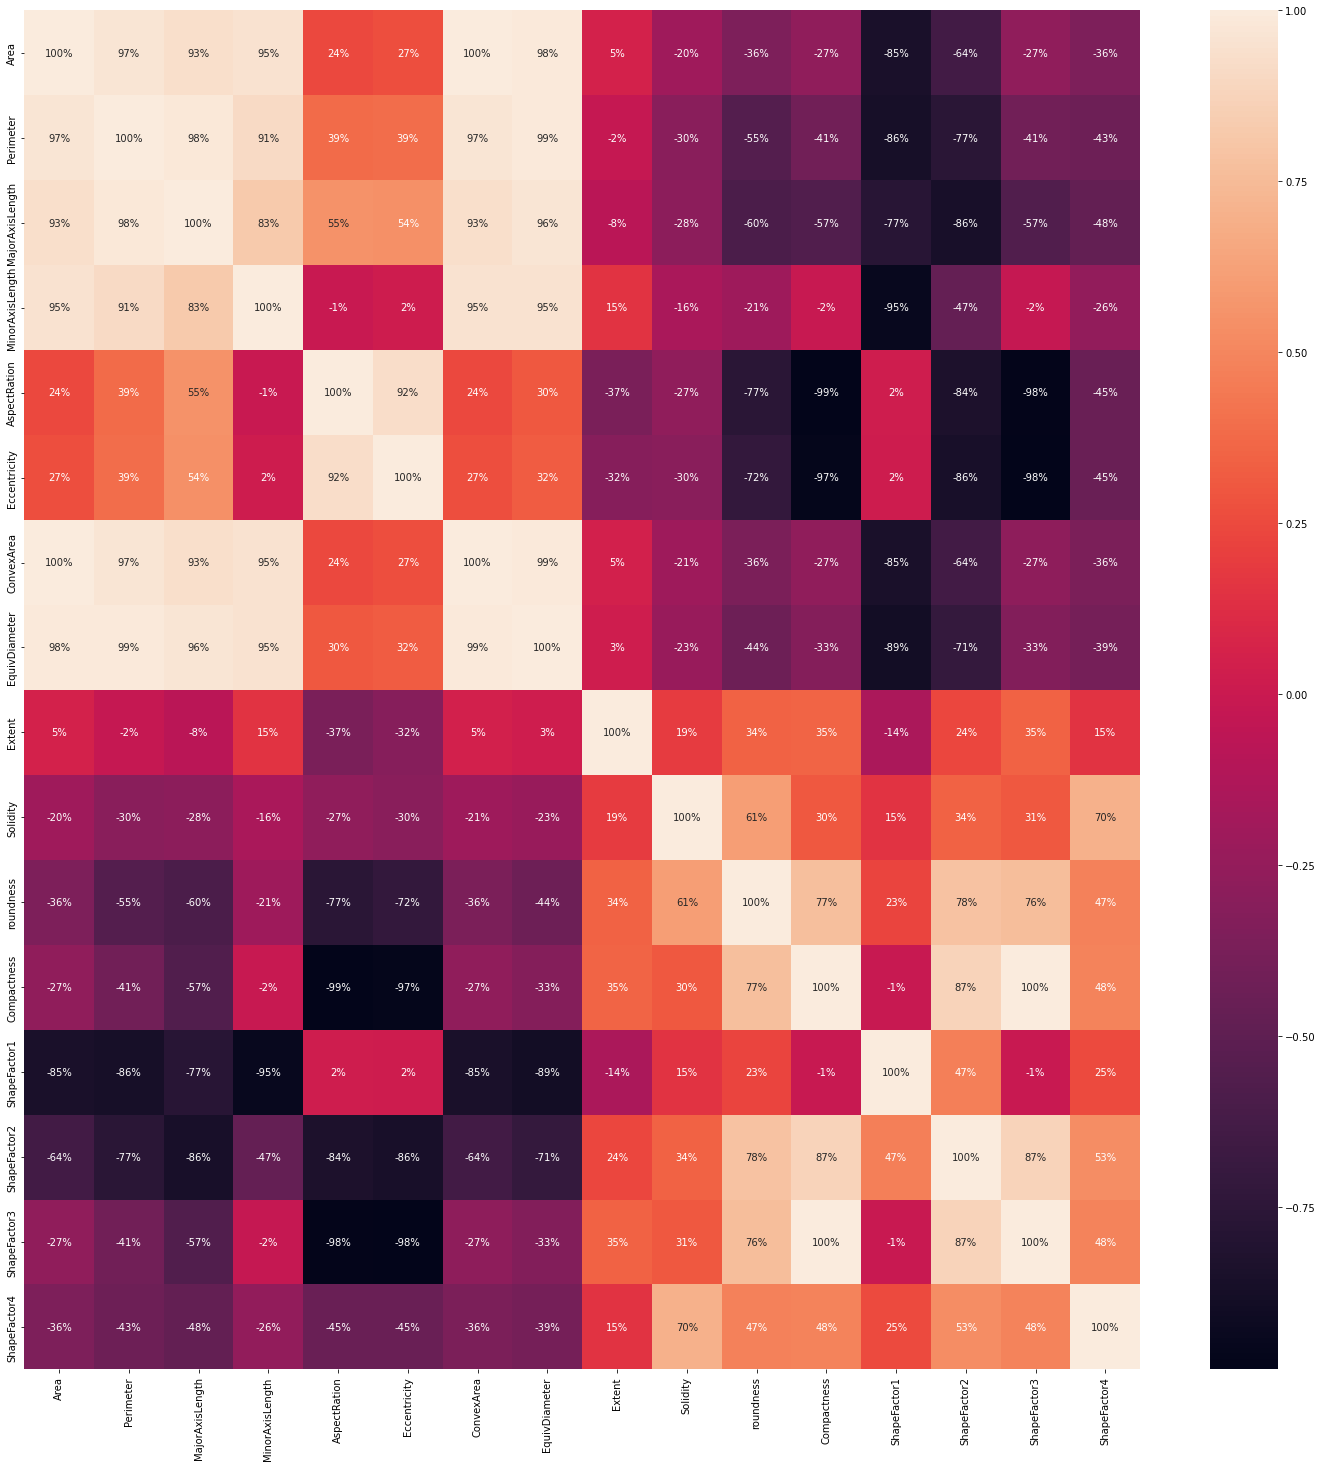

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(25,25))
sns.heatmap(withPandas.iloc[:,:].corr(), annot=True, fmt='.0%')

Logistic regression is like a regression problem where the dependent variable is a categorical variable. It is widely used in linear classification problems. Although it is called regression, there is a classification here.

Firstly we used logistic regression classifier , then we used random forest classifier

In [28]:
from pyspark.sql.functions import rand
shuffledDF = df_last.orderBy(rand(seed=42))

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
    
def run_log_kfold(n,dataset):
    
    kf = KFold(n_splits= n)
    
    for train_index, test_index in kf.split(dataset):
        
        x2_train, x2_test  = dataset.iloc[train_index], dataset.iloc[test_index]
        
        x1_train=spark.createDataFrame(x2_train) 
        x1_test=spark.createDataFrame(x2_test) 

        return func(x1_train,x1_test,n)
        
def func(x1_train,x1_test,m):
    
    n = m
    accu_list = []
    avg_cm_0 = []
    avg_cm_1 = []
    avg_cm_2 = []
    avg_cm_3 = []
    avg_cm_4 = []
    avg_cm_5 = []
    avg_cm_6 = []
    
    
    featureassembler = VectorAssembler(inputCols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                                             'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                             'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                             'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], outputCol="features")

        

        
    output = featureassembler.transform(x1_train)

    finalized_data = output.select("features","Class")

    testoutput = featureassembler.transform(x1_test)
    
    finalized_testdata = testoutput.select("features","Class")
        

    lr = LogisticRegression(featuresCol="features", labelCol="Class")
    lr_model = lr.fit(finalized_data)

    predict_train = lr_model.transform(finalized_data)
    predict_test = lr_model.transform(finalized_testdata)


    print(predict_test.show(5))
        

    y_pred = predict_test.select("prediction").toPandas()
        
    y1_test = predict_test.select("Class").toPandas()
        
    cm = confusion_matrix(y1_test , y_pred)
        
    avg_cm_0.append(cm[0])
    avg_cm_1.append(cm[1])
    avg_cm_2.append(cm[2])
    avg_cm_3.append(cm[3])
    avg_cm_4.append(cm[4])
    avg_cm_5.append(cm[5])
    avg_cm_6.append(cm[6])
    
        
    accu_list.append(accuracy_score(y1_test, y_pred))
        
    
    return visual(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6)

for_last_chart = list()

def visual(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6):
    
    print("Average Accuracy Result for the {0} Fold : ".format(n) , sum(accu_list))
    
    avg_conf_matrix = []
    avg_conf_matrix.append(sum(avg_cm_0))
    avg_conf_matrix.append(sum(avg_cm_1))
    avg_conf_matrix.append(sum(avg_cm_2))
    avg_conf_matrix.append(sum(avg_cm_3))
    avg_conf_matrix.append(sum(avg_cm_4))
    avg_conf_matrix.append(sum(avg_cm_5))
    avg_conf_matrix.append(sum(avg_cm_6))
    
    
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(sum(accu_list)), size = 15)
    plt.show()

    print()
    print("--------------------------------------------------------------------------------------------------")
    print("------------                      Classification is Done.                     --------------------")
    print("--------------------------------------------------------------------------------------------------")
    print()
    
    
    result = sum(accu_list)
    for_last_chart.append(result)

def last_chart():
    print(for_last_chart)
    plt.plot(range(2,11,2), for_last_chart, color = 'blue')
    plt.title('Support Vector Classifier')
    plt.xlabel('K Fold')
    plt.ylabel('Average Accuracy')
    plt.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[-17.709857299208...|[4.66809943659324...|       6.0|
|[58434.0,980.706,...|    2|[-2.8065510112604...|[1.53921343326192...|       2.0|
|[50218.0,822.578,...|    4|[-2.1052419454962...|[7.82254130519344...|       4.0|
|[94354.0,1178.195...|    3|[-24.073320326515...|[5.28103888731700...|       3.0|
|[46090.0,779.136,...|    4|[1.57449854626344...|[0.00287259028477...|       4.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows

None
Average Accuracy Result for the 2 Fold :  0.9224213928886277


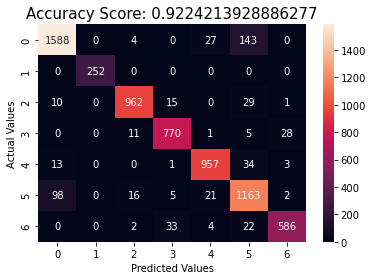


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[-18.125696892034...|[5.78553453553977...|       6.0|
|[58434.0,980.706,...|    2|[-3.6829065578605...|[1.21239889865903...|       2.0|
|[50218.0,822.578,...|    4|[-2.1481281927980...|[8.56084388247411...|       4.0|
|[94354.0,1178.195...|    3|[-24.811290791724...|[2.55434374055295...|       3.0|
|[46090.0,779.136,...|    4|[1.57782130731329...|[0.00399116490349...|       4.0|
+--------------------+-----+-----------------

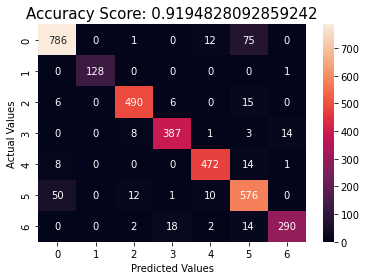


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[-18.096177520563...|[4.95917442552261...|       6.0|
|[58434.0,980.706,...|    2|[-3.7540225005931...|[9.00903722638889...|       2.0|
|[50218.0,822.578,...|    4|[-2.3930589958768...|[8.35956269487743...|       4.0|
|[94354.0,1178.195...|    3|[-24.674579410762...|[2.92654796676666...|       3.0|
|[46090.0,779.136,...|    4|[1.44989204064719...|[0.00434043096244...|       4.0|
+--------------------+-----+-----------------

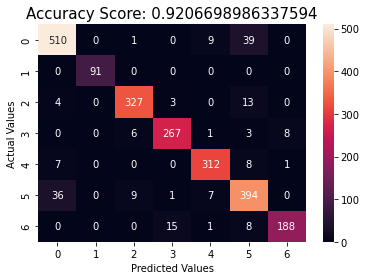


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[-18.695849517659...|[2.37335298422152...|       6.0|
|[58434.0,980.706,...|    2|[-4.0527412109165...|[4.33190970186726...|       2.0|
|[50218.0,822.578,...|    4|[-2.8630656686223...|[7.04862861218206...|       4.0|
|[94354.0,1178.195...|    3|[-25.086898294981...|[1.50819174615531...|       3.0|
|[46090.0,779.136,...|    4|[1.14112963006797...|[0.00389478047579...|       4.0|
+--------------------+-----+-----------------

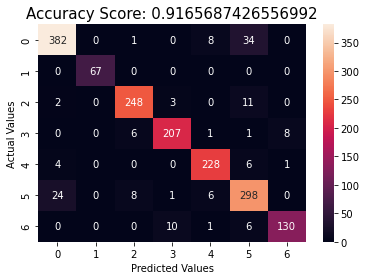


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[-18.433666587683...|[3.20118962458576...|       6.0|
|[58434.0,980.706,...|    2|[-3.7794105133540...|[6.10551105948201...|       2.0|
|[50218.0,822.578,...|    4|[-2.9291199828939...|[6.98184338339027...|       4.0|
|[94354.0,1178.195...|    3|[-24.709218950517...|[2.29190635715177...|       3.0|
|[46090.0,779.136,...|    4|[1.05245373938234...|[0.00370991742467...|       4.0|
+--------------------+-----+-----------------

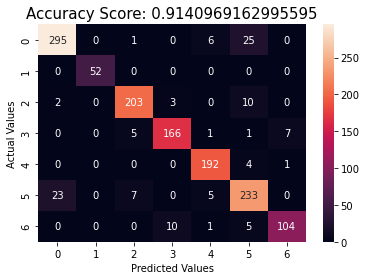


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

[0.9224213928886277, 0.9194828092859242, 0.9206698986337594, 0.9165687426556992, 0.9140969162995595]


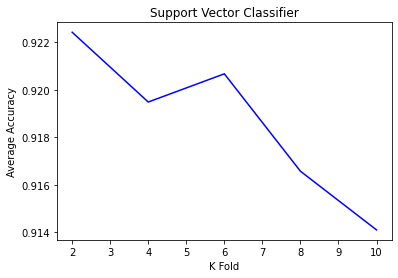

In [30]:
def run_log():
#   for svm
    each_accu = []
    for i in range(2,11,2):
        each_accu.append(run_log_kfold(i,shuffledDF.toPandas()))
    return each_accu
log = run_log()
last_chart()

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
    
def rf_k_fold(n,dataset):
    
    kf = KFold(n_splits= n)
    
    for train_index, test_index in kf.split(dataset):
        
        x2_train, x2_test  = dataset.iloc[train_index], dataset.iloc[test_index]
        
        x1_train=spark.createDataFrame(x2_train) 
        x1_test=spark.createDataFrame(x2_test) 

        return func_rf(x1_train,x1_test,n)
        
def func_rf(x1_train,x1_test,m):
    
    n = m
    accu_list = []
    avg_cm_0 = []
    avg_cm_1 = []
    avg_cm_2 = []
    avg_cm_3 = []
    avg_cm_4 = []
    avg_cm_5 = []
    avg_cm_6 = []
    
    
    featureassembler = VectorAssembler(inputCols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                                             'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                             'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                             'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], outputCol="features")

        

        
    output = featureassembler.transform(x1_train)

    finalized_data = output.select("features","Class")

    testoutput = featureassembler.transform(x1_test)
    
    finalized_testdata = testoutput.select("features","Class")
        

    rf = RandomForestClassifier(featuresCol="features", labelCol="Class")
    rf_model = rf.fit(finalized_data)

    predict_train_rf = rf_model.transform(finalized_data)
    predict_test_rf = rf_model.transform(finalized_testdata)


    print(predict_test_rf.show(5))


    y_pred = predict_test_rf.select("prediction").toPandas()
        
    y1_test = predict_test_rf.select("Class").toPandas()
        
    cm = confusion_matrix(y1_test , y_pred)
        
    avg_cm_0.append(cm[0])
    avg_cm_1.append(cm[1])
    avg_cm_2.append(cm[2])
    avg_cm_3.append(cm[3])
    avg_cm_4.append(cm[4])
    avg_cm_5.append(cm[5])
    avg_cm_6.append(cm[6])
    
        
    accu_list.append(accuracy_score(y1_test, y_pred))
        
    
    return visual_rf(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6)

for_last_chart_rf = list()

def visual_rf(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6):
    
    print("Average Accuracy Result for the {0} Fold : ".format(n) , sum(accu_list))
    
    avg_conf_matrix = []
    avg_conf_matrix.append(sum(avg_cm_0))
    avg_conf_matrix.append(sum(avg_cm_1))
    avg_conf_matrix.append(sum(avg_cm_2))
    avg_conf_matrix.append(sum(avg_cm_3))
    avg_conf_matrix.append(sum(avg_cm_4))
    avg_conf_matrix.append(sum(avg_cm_5))
    avg_conf_matrix.append(sum(avg_cm_6))
        
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(sum(accu_list)), size = 15)
    plt.show()
    
    print()
    print("--------------------------------------------------------------------------------------------------")
    print("------------                      Classification is Done.                     --------------------")
    print("--------------------------------------------------------------------------------------------------")
    print()
    
    result = sum(accu_list)
    for_last_chart_rf.append(result)

def last_chart_rf():
    print(for_last_chart_rf)
    plt.plot(range(2,11,2), for_last_chart_rf, color = 'blue')
    plt.title('Support Vector Classifier')
    plt.xlabel('K Fold')
    plt.ylabel('Average Accuracy')
    plt.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[0.0,0.6205915349...|[0.0,0.0310295767...|       3.0|
|[58434.0,980.706,...|    2|[0.0,0.0,19.62205...|[0.0,0.0,0.981102...|       2.0|
|[50218.0,822.578,...|    4|[0.33960545670454...|[0.01698027283522...|       4.0|
|[94354.0,1178.195...|    3|[0.0,0.7826706383...|[0.0,0.0391335319...|       3.0|
|[46090.0,779.136,...|    4|[1.03139862256936...|[0.05156993112846...|       4.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows

None
Average Accuracy Result for the 2 Fold :  0.883191301792536


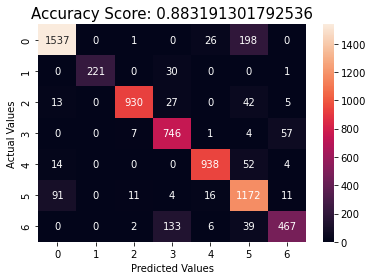


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[0.0,0.5756992400...|[0.0,0.0287849620...|       3.0|
|[58434.0,980.706,...|    2|[0.00169907916685...|[8.49539583426445...|       2.0|
|[50218.0,822.578,...|    4|[0.25932418490142...|[0.01296620924507...|       4.0|
|[94354.0,1178.195...|    3|[0.0,0.6737654638...|[0.0,0.0336882731...|       3.0|
|[46090.0,779.136,...|    4|[0.44346609962001...|[0.02217330498100...|       4.0|
+--------------------+-----+-----------------

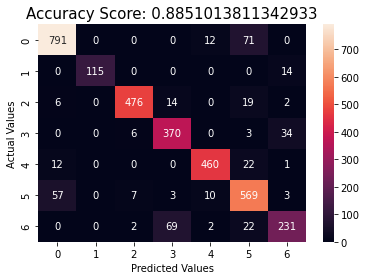


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[0.0,0.2932090582...|[0.0,0.0146604529...|       3.0|
|[58434.0,980.706,...|    2|[0.01065415577777...|[5.32707788888925...|       2.0|
|[50218.0,822.578,...|    4|[0.46680514324800...|[0.02334025716240...|       4.0|
|[94354.0,1178.195...|    3|[0.0,0.2940174657...|[0.0,0.0147008732...|       3.0|
|[46090.0,779.136,...|    4|[0.60490181316146...|[0.03024509065807...|       4.0|
+--------------------+-----+-----------------

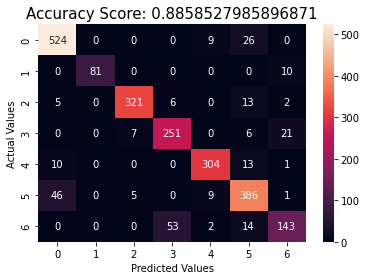


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[0.0,0.1973580430...|[0.0,0.0098679021...|       3.0|
|[58434.0,980.706,...|    2|[0.00272140150761...|[1.36070075380507...|       2.0|
|[50218.0,822.578,...|    4|[0.29167649605821...|[0.01458382480291...|       4.0|
|[94354.0,1178.195...|    3|[0.0,0.2526305345...|[0.0,0.0126315267...|       3.0|
|[46090.0,779.136,...|    4|[0.82827330254286...|[0.04141366512714...|       4.0|
+--------------------+-----+-----------------

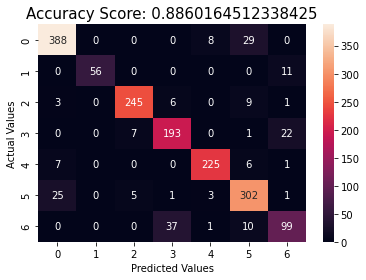


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[80420.0,1161.915...|    6|[0.0,0.5203052425...|[0.0,0.0260152621...|       3.0|
|[58434.0,980.706,...|    2|[0.00669409686164...|[3.34704843082279...|       2.0|
|[50218.0,822.578,...|    4|[0.31369921480323...|[0.01568496074016...|       4.0|
|[94354.0,1178.195...|    3|[0.0,0.7558235987...|[0.0,0.0377911799...|       3.0|
|[46090.0,779.136,...|    4|[0.90854431713320...|[0.04542721585666...|       4.0|
+--------------------+-----+-----------------

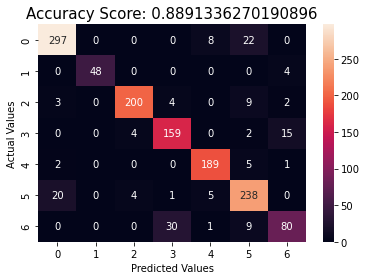


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

[0.883191301792536, 0.8851013811342933, 0.8858527985896871, 0.8860164512338425, 0.8891336270190896]


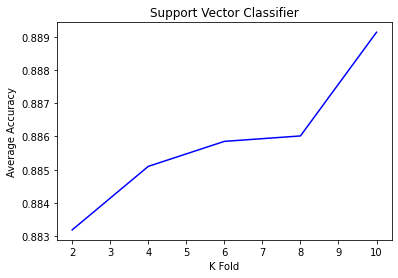

In [32]:
def run_rf():
#   for random forest classifier
    each_accu = []
    for i in range(2,11,2):
        each_accu.append(rf_k_fold(i,shuffledDF.toPandas()))
    return each_accu
rf = run_rf()
last_chart_rf()

-

SCALING

In [33]:
from pyspark.ml.feature import MinMaxScaler




featureassembler = VectorAssembler(inputCols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                                         'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                         'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                         'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], outputCol="features")

output = featureassembler.transform(df_last)

finalized_data = output.select("features","Class")




trainingData_n = shuffledDF

featureassembler_n = VectorAssembler(inputCols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                                         'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
                                         'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                         'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], outputCol="features")

output_n = featureassembler_n.transform(trainingData_n)

finalized_data_n = output_n.select("features","Class")



scaler_class = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model_class =  scaler_class.fit(finalized_data_n.select("features"))
normalized_df_class = scaler_model_class.transform(finalized_data_n)


normalized_df_class.show()

normalized_df_class.select("scaled_features").show()

+--------------------+-----+--------------------+
|            features|Class|     scaled_features|
+--------------------+-----+--------------------+
|[80420.0,1161.915...|    6|[0.25619566516934...|
|[58434.0,980.706,...|    2|[0.16231703359579...|
|[50218.0,822.578,...|    4|[0.12723530717860...|
|[94354.0,1178.195...|    3|[0.31569283847717...|
|[46090.0,779.136,...|    4|[0.10960904541495...|
|[27194.0,603.474,...|    0|[0.02892449059761...|
|[69852.0,1094.715...|    6|[0.21107106867751...|
|[39629.0,719.764,...|    4|[0.08202104220396...|
|[40748.0,760.445,...|    0|[0.08679909135937...|
|[79295.0,1067.768...|    3|[0.25139199644742...|
|[52108.0,911.035,...|    2|[0.13530547063143...|
|[40366.0,778.838,...|    5|[0.08516797895779...|
|[41114.0,803.231,...|    2|[0.08836188491690...|
|[76819.0,1063.539...|    3|[0.24081965533143...|
|[42343.0,777.505,...|    5|[0.09360962612512...|
|[46338.0,798.429,...|    5|[0.11066798749765...|
|[73658.0,1040.73,...|    3|[0.22732241370476...|


# LOGISTIC REGRESSION CLASSIFICATION WITH NORMALIZED DATA

In [34]:
        
def log_scaled_kfold(n,dataset):
    
    kf = KFold(n_splits= n)
    
    for train_index, test_index in kf.split(dataset):
        
        x2_train, x2_test  = dataset.iloc[train_index], dataset.iloc[test_index]
        
        x1_train=spark.createDataFrame(x2_train) 
        x1_test=spark.createDataFrame(x2_test) 

        return func_sca(x1_train,x1_test,n)
        
def func_sca(x1_train,x1_test,m):
    
    n = m
    accu_list = []
    avg_cm_0 = []
    avg_cm_1 = []
    avg_cm_2 = []
    avg_cm_3 = []
    avg_cm_4 = []
    avg_cm_5 = []
    avg_cm_6 = []

    finalized_data = x1_train.select("scaled_features","Class")


    finalized_testdata = x1_test.select("scaled_features","Class")
        
        
    lr = LogisticRegression(featuresCol="scaled_features", labelCol="Class")
    lr_model = lr.fit(finalized_data)

    predict_train = lr_model.transform(finalized_data)
    predict_test = lr_model.transform(finalized_testdata)
    


    print(predict_test.show(5))
        

    y_pred = predict_test.select("prediction").toPandas()
        
    y1_test = predict_test.select("Class").toPandas()
        
    cm = confusion_matrix(y1_test , y_pred)
        
    avg_cm_0.append(cm[0])
    avg_cm_1.append(cm[1])
    avg_cm_2.append(cm[2])
    avg_cm_3.append(cm[3])
    avg_cm_4.append(cm[4])
    avg_cm_5.append(cm[5])
    avg_cm_6.append(cm[6])
    
        
    accu_list.append(accuracy_score(y1_test, y_pred))
        
    
    return visual_sca(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6)

for_last_chart_sca = list()

def visual_sca(accu_list,n,avg_cm_0,avg_cm_1,avg_cm_2,avg_cm_3,avg_cm_4,avg_cm_5,avg_cm_6):
    
    print("Average Accuracy Result for the {0} Fold : ".format(n) , sum(accu_list))
    
    avg_conf_matrix = []
    avg_conf_matrix.append(sum(avg_cm_0))
    avg_conf_matrix.append(sum(avg_cm_1))
    avg_conf_matrix.append(sum(avg_cm_2))
    avg_conf_matrix.append(sum(avg_cm_3))
    avg_conf_matrix.append(sum(avg_cm_4))
    avg_conf_matrix.append(sum(avg_cm_5))
    avg_conf_matrix.append(sum(avg_cm_6))
    
    
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(sum(accu_list)), size = 15)
    plt.show()
    
    print()
    print("--------------------------------------------------------------------------------------------------")
    print("------------                      Classification is Done.                     --------------------")
    print("--------------------------------------------------------------------------------------------------")
    print()
    
    result = sum(accu_list)
    for_last_chart_sca.append(result)

def last_chart_log_sca():
    print(for_last_chart_sca)
    plt.plot(range(2,11,2), for_last_chart_sca, color = 'blue')
    plt.title('Logistic Regressor Classifier - SCALED')
    plt.xlabel('K Fold')
    plt.ylabel('Average Accuracy')
    plt.show()

+--------------------+-----+--------------------+--------------------+----------+
|     scaled_features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.25619566516934...|    6|[-17.709857277390...|[4.66809946017483...|       6.0|
|[0.16231703359579...|    2|[-2.8065509256748...|[1.53921356028269...|       2.0|
|[0.12723530717860...|    4|[-2.1052419041814...|[7.82254122492909...|       4.0|
|[0.31569283847717...|    3|[-24.073320289272...|[5.28103871408281...|       3.0|
|[0.10960904541495...|    4|[1.57449860229083...|[0.00287259040380...|       4.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows

None
Average Accuracy Result for the 2 Fold :  0.9224213928886277


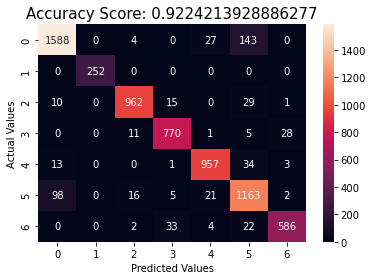


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|     scaled_features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.25619566516934...|    6|[-18.125647776134...|[5.78611066028035...|       6.0|
|[0.16231703359579...|    2|[-3.6828930466204...|[1.21257321577794...|       2.0|
|[0.12723530717860...|    4|[-2.1481580545340...|[8.56088841611935...|       4.0|
|[0.31569283847717...|    3|[-24.811241179150...|[2.55444741360148...|       3.0|
|[0.10960904541495...|    4|[1.5777996163067,...|[0.00399124269083...|       4.0|
+--------------------+-----+-----------------

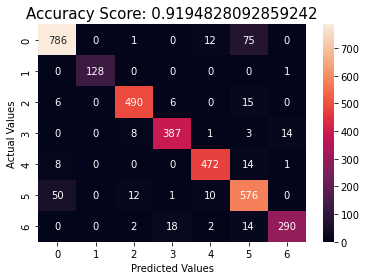


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|     scaled_features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.25619566516934...|    6|[-18.096658078412...|[5.00544154161350...|       6.0|
|[0.16231703359579...|    2|[-3.7580330560787...|[9.04011945816038...|       2.0|
|[0.12723530717860...|    4|[-2.3974495025388...|[8.31855411571944...|       4.0|
|[0.31569283847717...|    3|[-24.670929764195...|[2.94763916831572...|       3.0|
|[0.10960904541495...|    4|[1.44609008406778...|[0.00433799978860...|       4.0|
+--------------------+-----+-----------------

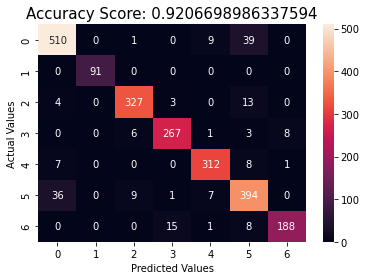


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|     scaled_features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.25619566516934...|    6|[-18.695875920202...|[2.37324958844661...|       6.0|
|[0.16231703359579...|    2|[-4.0527323501736...|[4.33182446903841...|       2.0|
|[0.12723530717860...|    4|[-2.8630798936035...|[7.04846194197402...|       4.0|
|[0.31569283847717...|    3|[-25.086924388124...|[1.50812175211005...|       3.0|
|[0.10960904541495...|    4|[1.14112129848093...|[0.00389469032036...|       4.0|
+--------------------+-----+-----------------

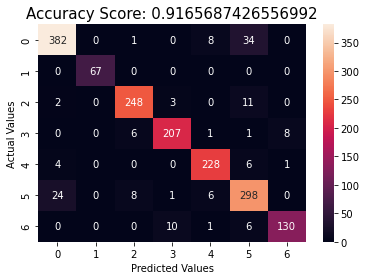


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

+--------------------+-----+--------------------+--------------------+----------+
|     scaled_features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.25619566516934...|    6|[-18.433666334568...|[3.20119069548376...|       6.0|
|[0.16231703359579...|    2|[-3.7794101912039...|[6.10551447841790...|       2.0|
|[0.12723530717860...|    4|[-2.9291199405021...|[6.98184519414986...|       4.0|
|[0.31569283847717...|    3|[-24.709218617692...|[2.29190731024958...|       3.0|
|[0.10960904541495...|    4|[1.05245375195044...|[0.00370991830743...|       4.0|
+--------------------+-----+-----------------

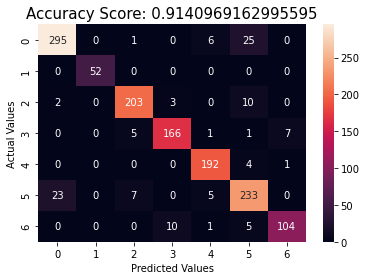


--------------------------------------------------------------------------------------------------
------------                      Classification is Done.                     --------------------
--------------------------------------------------------------------------------------------------

[0.9224213928886277, 0.9194828092859242, 0.9206698986337594, 0.9165687426556992, 0.9140969162995595]


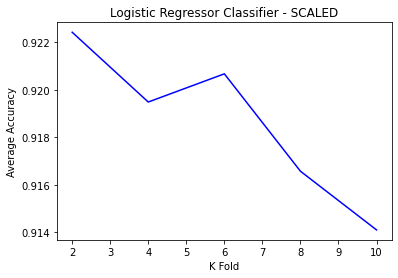

In [35]:
def run_log_scaled():
#   for logistic regression classifier - SCALED
    each_accu = []
    for i in range(2,11,2):
        each_accu.append(log_scaled_kfold(i,normalized_df_class.toPandas()))
    return each_accu
log_scaled = run_log_scaled()
last_chart_log_sca()

In general our parameters were our k value for k-fold validation and the dataset we would use.
Our dataset variables were original dataset and normalized dataset.

We used 2 different methods. One of them was Logistic Regression Classifier, which made classification despite its name being regressor, and the other was random forest.

We achieved better results in LR than in RF . Decision trees based RF did not work well in this problem. The biggest reasons for this were that the dataset was not fair and had too many features.

## References<a class="anchor" id="references"></a>

Our first project 
● https://github.com/tirthajyoti/Spark-with-Python
● https://github.com/jadianes/spark-py-notebooks
● https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning
● https://www.tutorialspoint.com/apache_spark/

and mainly used stackoverflow for our problems